In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# sns.set_theme()

In [2]:
df_list = []
for gen_kernel in ("squared exponential", "rational quadratic", "gamma-exponential", "matern"):
    for identify_kernel in ("squared exponential", "rational quadratic", "gamma-exponential", "matern"):
        for d_observation in (100, 200, 500, 1000, 2000, 5000, 10000):
            for method in ('GPLVM', 'IKD'):
                df_list.append(pd.read_csv(f'outputs/{gen_kernel}_{identify_kernel}_{d_observation}_{method}.csv', index_col=0))
df = pd.concat(df_list, ignore_index=True)
df.d_observation = df.d_observation.astype(str)
df['gen_kernel'] = df['gen_kernel'].replace(['gamma-exponential', 'matern'], ['$\\gamma$-exponential', 'Matérn'])
df['identify_kernel'] = df['identify_kernel'].replace(['gamma-exponential', 'matern'], ['$\\gamma$-exponential', 'Matérn'])

In [3]:
# g = sns.FacetGrid(df, row='gen_kernel', col='identify_kernel', hue='method', margin_titles=True, height=2.5, aspect=1.4)
# g.map(sns.lineplot, 'n_samples', 'r2_true')
# g.add_legend()
# g.set(ylabel='$R^2$')
# g.fig.suptitle('$R^2$ vs number of samples for different methods, compared with true latents', y=1.05)

# g = sns.FacetGrid(df, row='gen_kernel', col='identify_kernel', hue='method', margin_titles=True, height=2.5, aspect=1.4)
# g.map(sns.lineplot, 'n_samples', 'r2_samp')
# g.add_legend()
# g.set(ylabel='$R^2$')
# g.fig.suptitle('$R^2$ vs number of samples for different methods, compared with sample covariance matrix', y=1.05)
# g.set(ylim=(-0.5, 1))

# g = sns.FacetGrid(df, row='gen_kernel', col='identify_kernel', hue='method', margin_titles=True, height=2.5, aspect=1.4)
# g.map(sns.lineplot, 'n_samples', 'mse_true')
# g.add_legend()
# g.set(ylabel='MSE')
# g.fig.suptitle('MSE vs number of samples for different methods, compared with true latents', y=1.05)

# g = sns.FacetGrid(df, row='gen_kernel', col='identify_kernel', hue='method', margin_titles=True, height=2.5, aspect=1.4)
# g.map(sns.lineplot, 'n_samples', 'mse_samp')
# g.add_legend()
# g.set(ylabel='MSE')
# g.fig.suptitle('MSE vs number of samples for different methods, compared with sample covariance matrix', y=1.05)

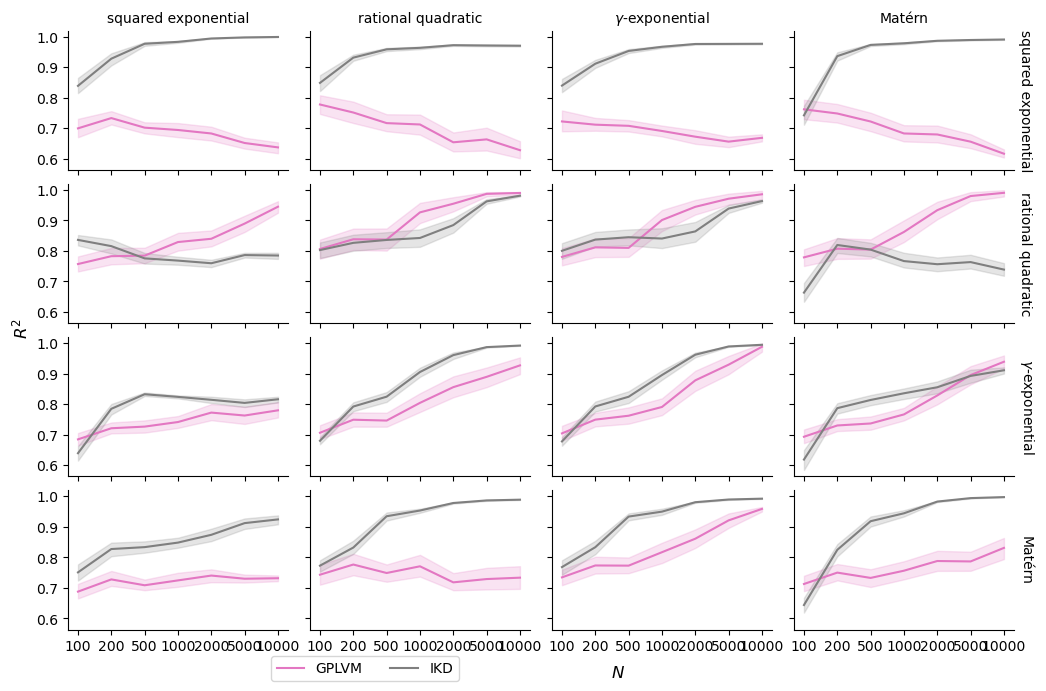

In [5]:
g = sns.FacetGrid(df, row='gen_kernel', col='identify_kernel', hue='method', palette=['C6', 'C7'], margin_titles=True, height=1.8, aspect=1.5)
g.map(sns.lineplot, 'd_observation', '$R^2$')
g.set(xlabel=None, ylabel=None)
g.fig.supxlabel('$N$')
g.fig.supylabel('$R^2$')
[plt.setp(ax.texts, text="") for ax in g.axes.flat]
g.set_titles(row_template='{row_name}', col_template='{col_name}')
g.add_legend(loc="lower center", bbox_to_anchor=(.3, 0), ncol=3, title=False, frameon=True)
plt.subplots_adjust(hspace=0.1, wspace=0.1)
g.savefig('kernel_mismatch.pdf')